# Análisis de Ratios Fundamentales del Mercado Argentino

Este notebook proporciona una visualización específica de las métricas fundamentales **disponibles** para las principales acciones del mercado argentino. Veremos una visión directa de los ratios de mercado más relevantes para la toma de decisiones de inversión.

El código está optimizado para extraer datos actualizados mediante la API de Yahoo Finance, procesar automáticamente las métricas disponibles y generar visualizaciones comparativas claras. Esto permite identificar rápidamente fortalezas y debilidades relativas entre las diferentes empresas cotizantes.

Desarrollado para inversores y analistas que priorizan el análisis fundamental en sus estrategias de inversión en el mercado argentino.

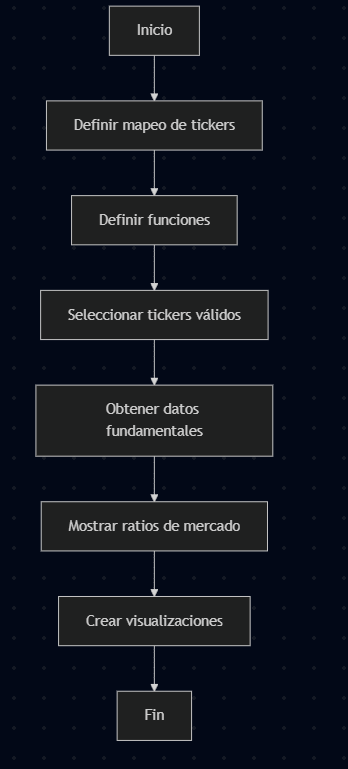

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Mapeo de tickers de acciones argentinas a sus equivalentes en Yahoo Finance
STOCK_TICKERS = {
    'ALUA': 'ALUA.BA',
    'BBAR': 'BBAR.BA',
    'BMA': 'BMA.BA',
    'BYMA': 'BYMA.BA',
    'CEPU': 'CEPU.BA',
    'COME': 'COME.BA',
    'CRES': 'CRES.BA',
    'EDN': 'EDN.BA',
    'GGAL': 'GGAL.BA',
    'HARG': 'HARG.BA',
    'LOMA': 'LOMA.BA',
    'METR': 'METR.BA',
    'MIRG': 'MIRG.BA',
    'PAMP': 'PAMP.BA',
    'SUPV': 'SUPV.BA',
    'TECO2': 'TECO2.BA',
    'TGNO4': 'TGNO4.BA',
    'TGSU2': 'TGSU2.BA',
    'TRAN': 'TRAN.BA',
    'TXAR': 'TXAR.BA',
    'YPFD': 'YPFD.BA'
}

🔍 **Explicación de cada ratio:**

- **`trailingPE`** → *Price-to-Earnings Ratio TTM* → Precio actual dividido por ganancias por acción de los últimos 12 meses.

- **`forwardPE`** → *Forward Price-to-Earnings Ratio* → Precio actual dividido por estimaciones de EPS futuros (generalmente 12 meses hacia adelante).

- **`pegRatio`** → *Price/Earnings to Growth* → P/E dividido por el crecimiento estimado de ganancias. Este **ya incorpora crecimiento futuro**.

- **`dividendYield`** → Rendimiento de dividendos anual estimado (en porcentaje del precio actual). Puede basarse en dividendos pagados el último año.

- **`trailingEps`** → Ganancias por acción de los últimos 12 meses.

- **`returnOnEquity`** → Rentabilidad sobre el patrimonio, típicamente también en base TTM.

- **`profitMargins`** → Margen neto, también basado generalmente en los últimos 12 meses.




In [46]:
def fetch_fundamental_data(tickers):
    """
    Obtiene datos fundamentales para las acciones dadas, centrado en ratios de mercado.

    Notas:
    - La mayoría de las métricas corresponden a los últimos 12 meses (TTM - trailing twelve months).
    - Algunas métricas (como P/E futuro y PEG) incluyen estimaciones de analistas.

    Parámetros:
    - tickers: Lista de tickers de acciones

    Retorna:
    - DataFrame de Pandas con métricas fundamentales disponibles
    """
    fundamentals_data = []
    
    for ticker in tickers:
        yf_ticker = STOCK_TICKERS.get(ticker, ticker)
        stock = yf.Ticker(yf_ticker)
        
        # Métricas fundamentales clave
        info = stock.info
        
        fundamentals = {
            'Ticker': ticker,
            'Capitalización de Mercado': info.get('marketCap', np.nan),
            'Relación P/E': info.get('trailingPE', np.nan),
            'P/E Futuro': info.get('forwardPE', np.nan),
            'Relación PEG': info.get('pegRatio', np.nan),
            'Rendimiento por Dividendo': info.get('dividendYield', np.nan),
            'EPS ': info.get('trailingEps', np.nan),
            'ROE': info.get('returnOnEquity', np.nan),
            'Margen de Ganancia': info.get('profitMargins', np.nan)
        }
        
        fundamentals_data.append(fundamentals)
    
    # Crear DataFrame
    df = pd.DataFrame(fundamentals_data).set_index('Ticker')
    
    # Eliminar columnas que solo tienen valores NaN
    df = df.dropna(axis=1, how='all')
    
    return df


## Gráfico

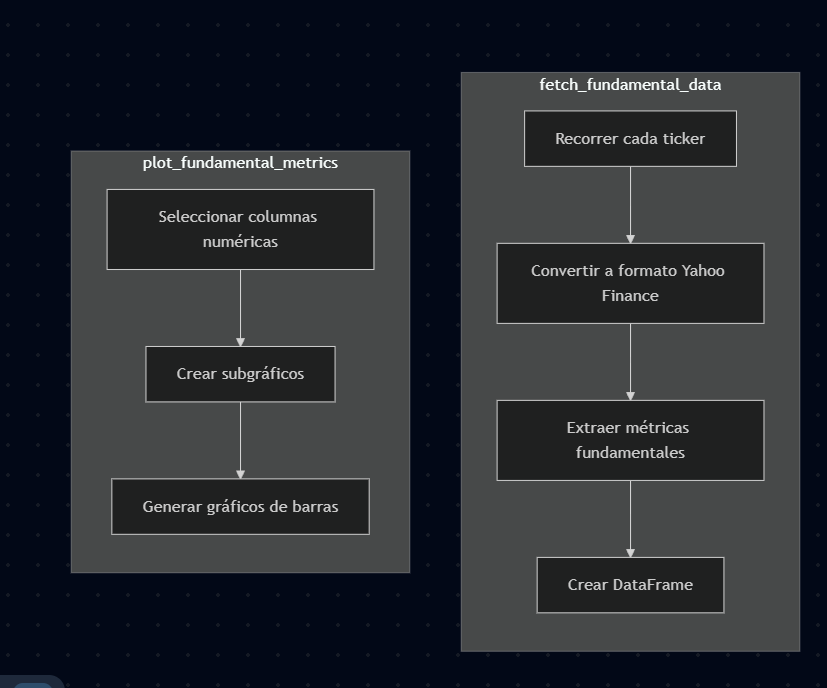

In [ ]:
def plot_fundamental_metrics(fundamentals_df):
    """
    Crea visualizaciones mejoradas para métricas fundamentales de mercado
    
    Parámetros:
    - fundamentals_df: DataFrame de Pandas con datos fundamentales
    """
    # Importaciones necesarias
    import matplotlib.patches as mpatches # Módulo de matplotlib para dibujar formas (rectángulos, círculos, etc) en gráficos.
    
    # Seleccionar columnas numéricas
    columnas_numericas = fundamentals_df.select_dtypes(include=[np.number]).columns
    
    if len(columnas_numericas) == 0:
        print("No hay métricas numéricas disponibles para graficar.")
        return
    
    # Configurar estilo de seaborn
    sns.set_theme(style="whitegrid")
    # Usar un esquema de colores por categoría/sector si es posible
    sectores = {
        'ALUA': 'Industria', 'BBAR': 'Financiero', 'BMA': 'Financiero', 'BYMA': 'Financiero',
        'CEPU': 'Energía', 'COME': 'Energía', 'CRES': 'Inmobiliario', 'EDN': 'Servicios Públicos',
        'GGAL': 'Financiero', 'HARG': 'Energía', 'LOMA': 'Industria', 'METR': 'Servicios Públicos',
        'MIRG': 'Tecnología', 'PAMP': 'Energía', 'SUPV': 'Financiero', 'TECO2': 'Telecomunicaciones',
        'TGNO4': 'Energía', 'TGSU2': 'Energía', 'TRAN': 'Transporte', 'TXAR': 'Industria',
        'YPFD': 'Energía'
    }
    
    # Asignar colores por sector
    sector_list = [sectores.get(ticker, 'Otros') for ticker in fundamentals_df.index]
    unique_sectors = list(set(sector_list))
    sector_colors = dict(zip(unique_sectors, sns.color_palette("viridis", len(unique_sectors))))
    colors = [sector_colors[sector] for sector in sector_list]
    
    # Crear subgráficos
    num_plots = len(columnas_numericas) # Número de métricas a graficar
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5*num_plots)) # Un solo dashboard o gráfico.
    fig.suptitle('Comparación de Ratios de Mercado', fontsize=20, fontweight='bold')
    
    # Añadir marca de agua
    fig.text(0.5, 0.01, '© Fede Martinez - Finanzas & Data', 
             fontsize=14, color='gray', ha='center', alpha=0.7)
    
    # Manejar el caso de una sola columna
    if num_plots == 1:
        ax = axes
        col = columnas_numericas[0]
        plot_single_metric(fundamentals_df, col, ax, colors)
    else:
        for i, col in enumerate(columnas_numericas):
            plot_single_metric(fundamentals_df, col, axes[i], colors)
    
    # Ajustar el espaciado entre subgráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # Crear una leyenda de sectores única
    sector_patches = [mpatches.Patch(color=sector_colors[sector], label=sector) for sector in unique_sectors]
    fig.legend(handles=sector_patches, loc='upper center', ncol=len(unique_sectors), 
               bbox_to_anchor=(0.5, 0), fontsize=12)
    
    # Añadir más espacio en la parte inferior para la leyenda
    fig.subplots_adjust(bottom=0.08)
    
    plt.show()



In [48]:
def plot_single_metric(df, column, ax, colors):
    """
    Grafica una sola métrica con manejo de valores extremos y formato mejorado
    """
    import matplotlib.ticker as ticker # Módulo de matplotlib para personalizar marcas y etiquetas en los ejes.
    
    # Crear una copia de los datos para no modificar el original
    data = df[column].copy()
    
    # Formatear los valores según la métrica
    if column == 'Capitalización de Mercado':
        # Formatear en millones/billones
        if data.max() >= 1e12:
            data = data / 1e12
            ylabel = 'Valor (billones)'
        elif data.max() >= 1e9:
            data = data / 1e9
            ylabel = 'Valor (miles de millones)'
        else:
            data = data / 1e6
            ylabel = 'Valor (millones)'
    elif 'Rendimiento' in column:
        # Convertir rendimientos a porcentaje
        data = data * 100
        ylabel = 'Porcentaje (%)'
    elif column in ['ROE', 'Margen de Ganancia']:
        # Convertir a porcentaje si son ratios
        data = data * 100
        ylabel = 'Porcentaje (%)'
    else:
        ylabel = 'Valor'
    
    # Identificar valores atípicos para potencialmente usar escala logarítmica
    use_log_scale = False
    if data.max() > 0 and data.max() / data.median() > 10:
        # Si hay valores extremos y son todos positivos, considerar escala logarítmica
        if data[data > 0].count() == data.count():
            use_log_scale = True
    
    # Crear el gráfico de barras
    bars = ax.bar(df.index, data, color=colors)
    
    # Aplicar escala logarítmica si es necesario
    if use_log_scale and column == 'P/E Futuro':
        ax.set_yscale('log')
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1f}'))
    
    # Añadir etiquetas de valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            if abs(height) > 1000:
                value_text = f'{height:.0f}'
            elif abs(height) > 100:
                value_text = f'{height:.1f}'
            elif abs(height) > 10:
                value_text = f'{height:.1f}'
            else:
                value_text = f'{height:.2f}'
            
            # Posicionar etiquetas según si el valor es positivo o negativo
            if height < 0:
                va = 'top'
                y_pos = height - (abs(height) * 0.05)
            else:
                va = 'bottom'
                y_pos = height + (abs(height) * 0.05) if height > 0 else 0.01
                
            ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                    value_text, ha='center', va=va, fontsize=9)
    
    # Configurar título y etiquetas
    ax.set_title(column, fontsize=16, fontweight='bold')
    ax.set_xlabel('Acciones', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    # Rotar etiquetas del eje x para mejor legibilidad
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Añadir marca de agua en cada subgráfico
    #ax.text(0.98, 0.02, '© Fede Martinez - Finanzas & Data', 
            #transform=ax.transAxes, fontsize=10, color='gray', 
            #ha='right', va='bottom', alpha=0.7)
    
    # Mejorar el grid para mayor legibilidad
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajustar límites del eje y para dar espacio a las etiquetas
    if not use_log_scale:
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax * 1.15)

##  Ejecución principal


Ratios de Mercado Disponibles:
         Capitalización de Mercado  Relación P/E   P/E Futuro  \
Ticker                                                         
ALUA                1867599970304     12.365592    25.752895   
BBAR                4871044464640     13.523859  2108.753400   
BMA                 6784322371584     13.153407    12.822187   
BYMA                1570749939712           NaN     7.750188   
CEPU                1961075671040     39.569435     4.925458   
COME                 433542397952      6.522759    34.837093   
CRES                 820153286656           NaN   765.363160   
EDN                 1650660474880      6.059534   141.410350   
GGAL               11773811884032      7.187402    10.177729   
HARG                 605729980416     14.973310    62.594550   
LOMA                1420781158400      9.240286    30.552070   
METR                1143689969664      7.406043          NaN   
MIRG                 386444951552     20.736073          NaN   
PAMP   

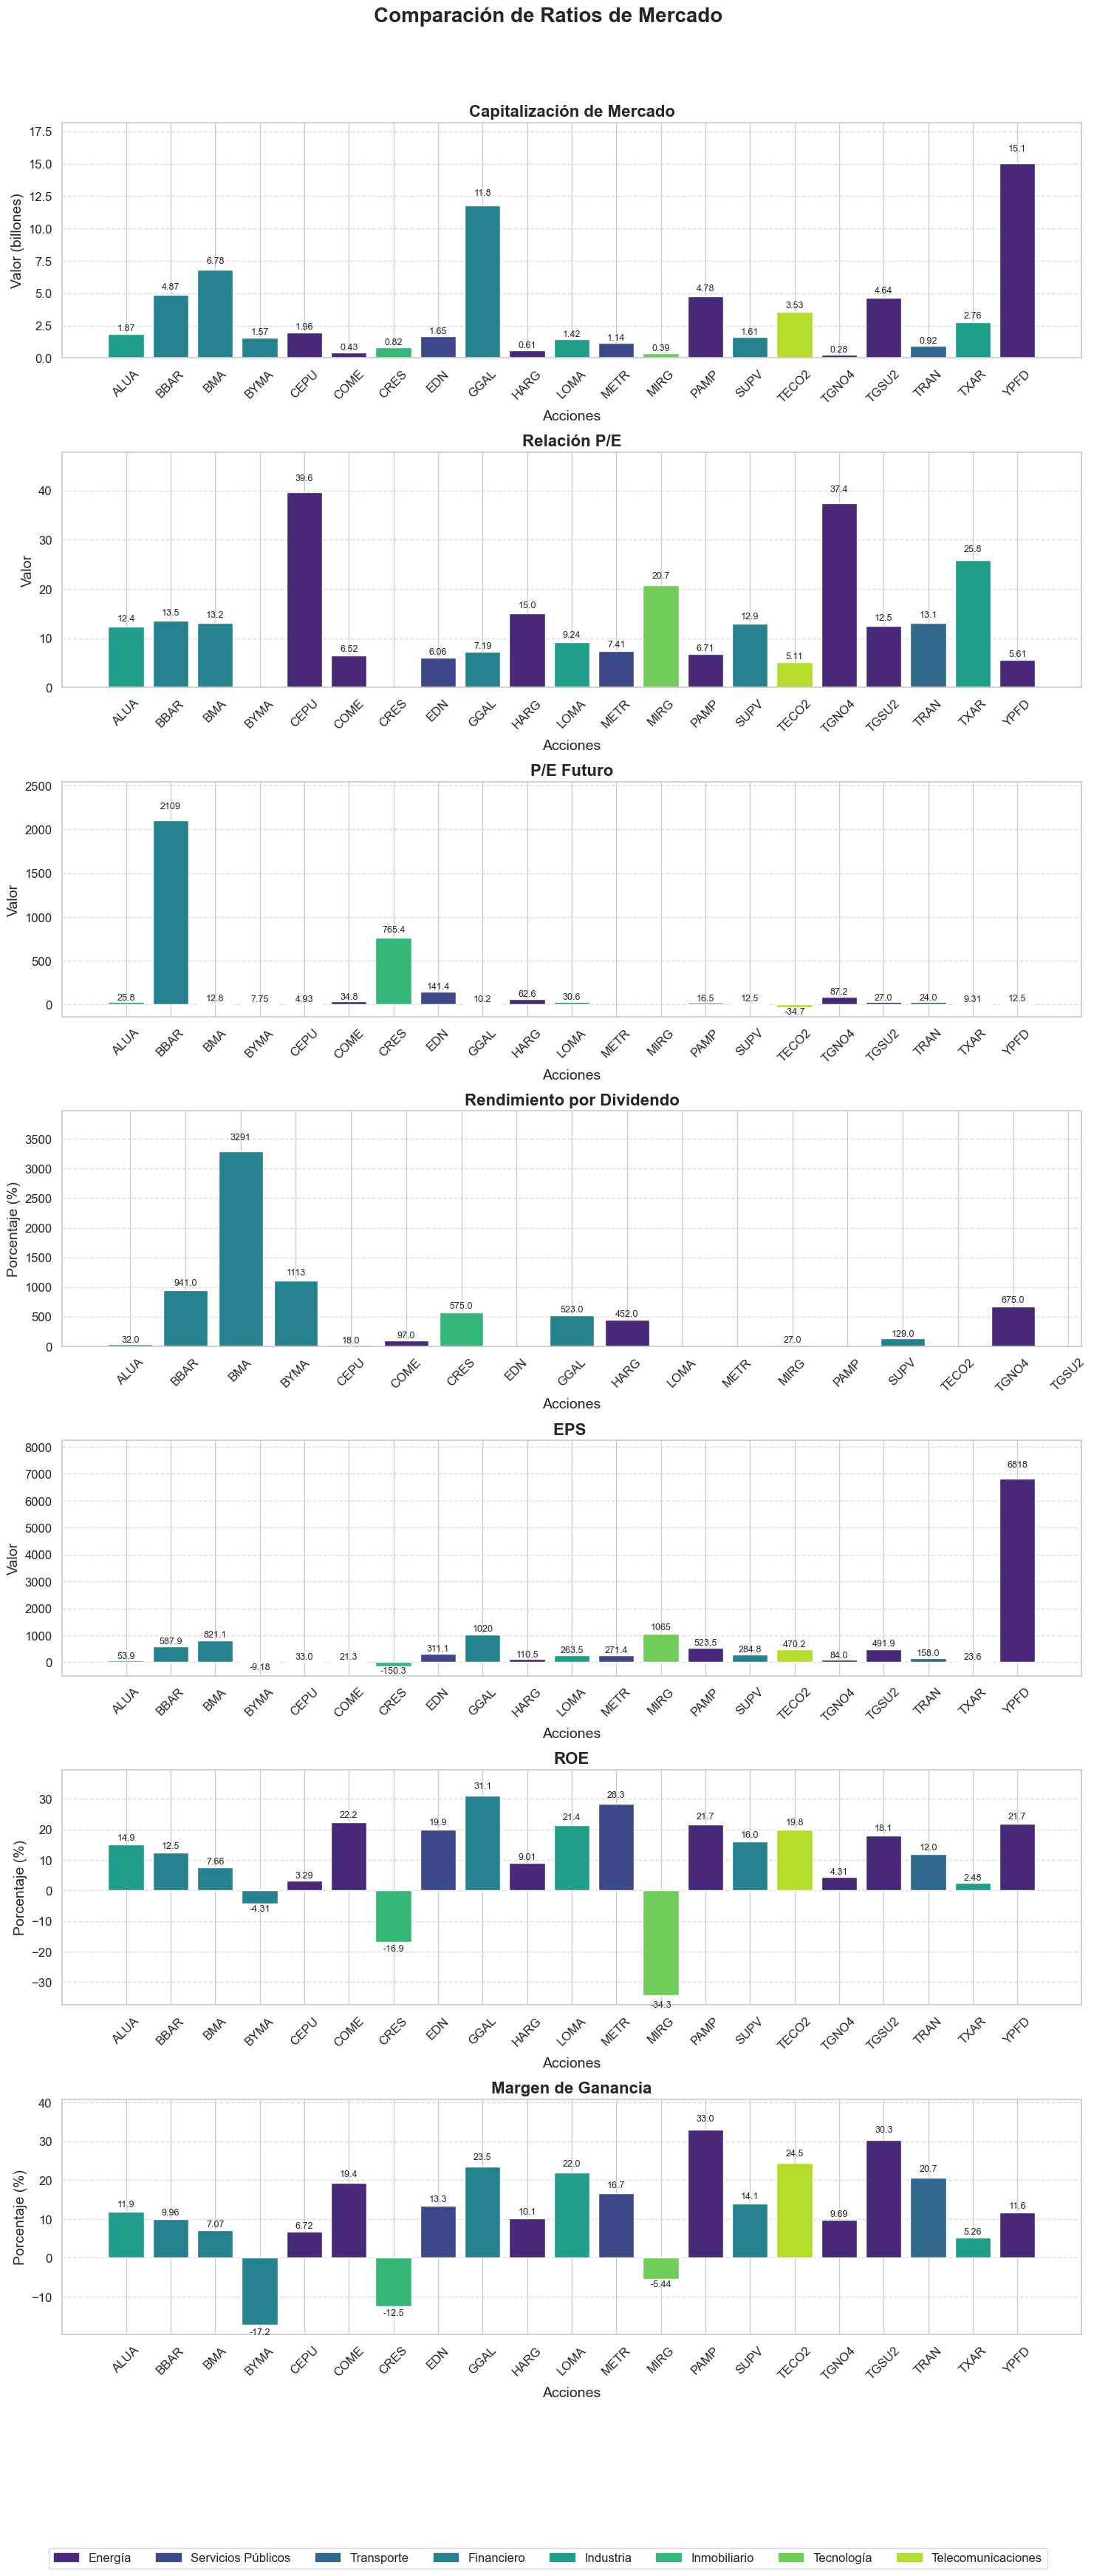

In [49]:

def main():
    # Seleccionar tickers
    valid_tickers = [
        'ALUA', 'BBAR', 'BMA', 'BYMA', 'CEPU', 'COME', 'CRES', 'EDN', 'GGAL',
        'HARG', 'LOMA', 'METR', 'MIRG', 'PAMP', 'SUPV', 'TECO2', 'TGNO4', 
        'TGSU2', 'TRAN', 'TXAR', 'YPFD'
    ]
    
    # Análisis fundamental - solo ratios de mercado
    fundamental_data = fetch_fundamental_data(valid_tickers)
    print("\nRatios de Mercado Disponibles:\n", fundamental_data)
    
    # Graficar métricas fundamentales disponibles
    plot_fundamental_metrics(fundamental_data)

if __name__ == "__main__":
    main()